## Exercise 1: Expected Value and Variance

In [1]:
x <- c(15.58, 15.9, 16.0, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

In [2]:
#Separating the awnser between Expected values
cat("The expected value for the method 1 is: ",weighted.mean(x, p1))
cat("\n")
cat("The expected value for the method 2 is: ",weighted.mean(x, p2))

The expected value for the method 1 is:  15.959
The expected value for the method 2 is:  15.9622

In [3]:
#And Variances ...
cat("The variance for the method 1 is: ",sum(((x - weighted.mean(x, p1)) ^ 2) * p1))
cat("\n")
cat("The variance for the method 2 is: ",sum(((x - weighted.mean(x, p2)) ^ 2) * p2))

The variance for the method 1 is:  0.033979
The variance for the method 2 is:  0.02816716

## Exercise 2: Waiting time at doctor's office

In [45]:
avg_wait <- 30
lambda <- 1/30; x <- 0:120

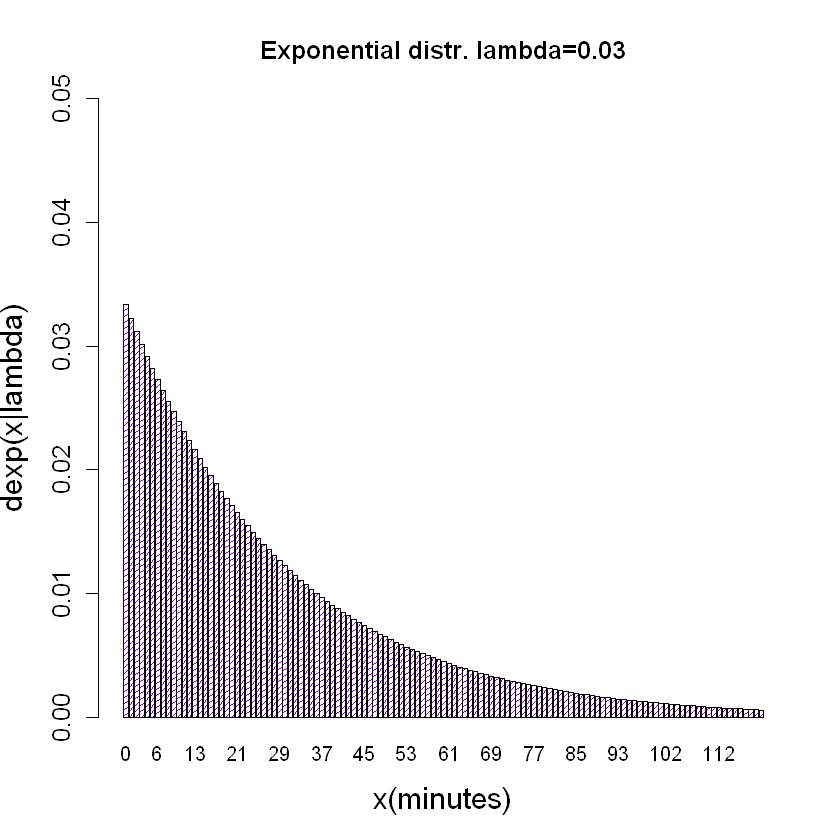

In [51]:
ap <- dexp(x,lambda)
barplot(ap , names=x, col="darkviolet", xlab="x(minutes)", ylab="dexp(x|lambda)",
density=30,
main = sprintf("Exponential distr. lambda=%.2f",lambda),
ylim=c(0,0.05),
cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)

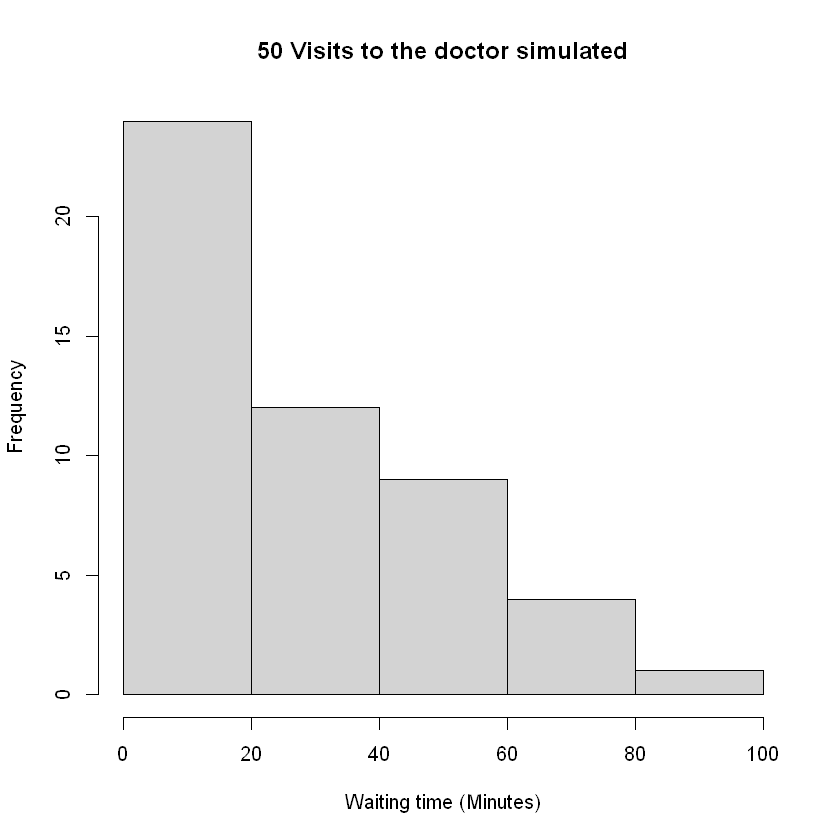

In [57]:
sample <- rexp(50,lambda)
hist(sample,
     main="50 Visits to the doctor simulated",
     xlab="Waiting time (Minutes)",
     breaks=6)

In [58]:
cat("Expected value calculated by R :" ,sum(ap*x),"\n")
cat("Expected value calculated by Simulation :" ,mean(sample),"\n")

Expected value calculated by R : 27.28636 
Expected value calculated by Simulation : 28.06527 


In [61]:
#In some runs the Simulation achieves a better result than the actual mean of the dist and both are a little bit off. 
#We can run the distribution with more numbers and it should get a better result
x2 <- 0:12000
ap2 <- dexp(x2,lambda)
cat("Expected value calculated by R :" ,sum(ap2*x2),"\n")

Expected value calculated by R : 29.99722 


In [62]:
#Also, we can run a lot more simulations and get the mean of them,
sample <- rexp(12000,lambda)
cat("Expected value calculated by Simulation :" ,mean(sample),"\n")

Expected value calculated by Simulation : 30.16177 


In [6]:
#Final awnser
cat(paste(c("P(X<10) = ", pexp(10,lambda),"\n")))
cat(paste(c("P(X>60) = ", 1-pexp(60,lambda),"\n")))

P(X<10) =  0.283468689426211 
P(X>60) =  0.135335283236613 


## Exercise 3: Typos in Book

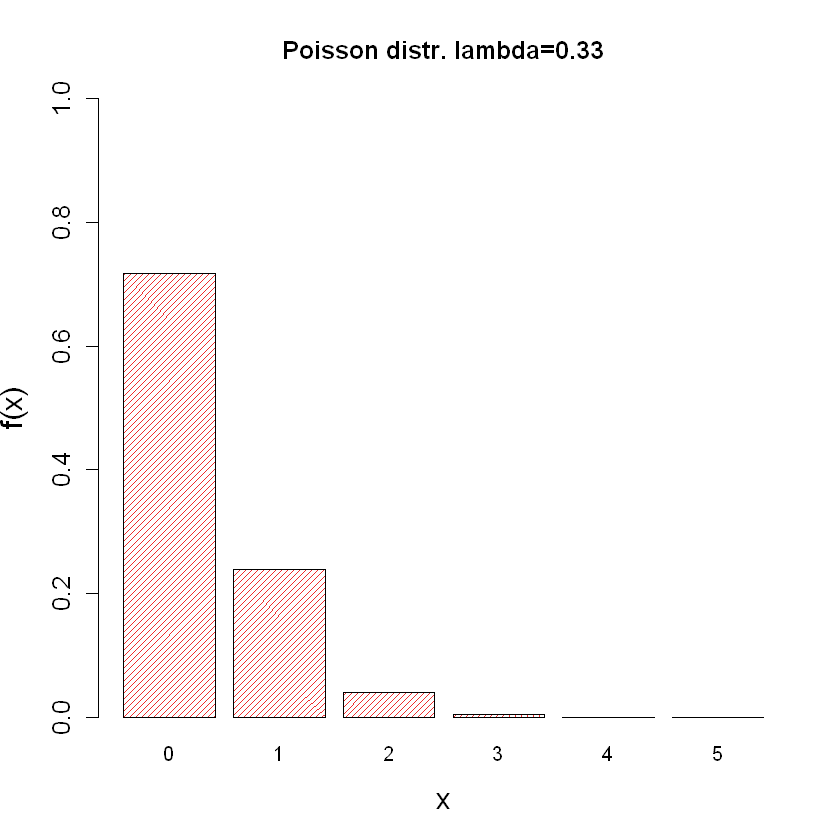

In [9]:
lambda <- 1/3
x <- 0:5
ap <- dpois(x,lambda)
barplot(ap , names=x, col="firebrick2", xlab="x", ylab="f(x)", density=30,
main = sprintf("Poisson distr. lambda=%.2f",lambda),
ylim=c(0,1),
cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)

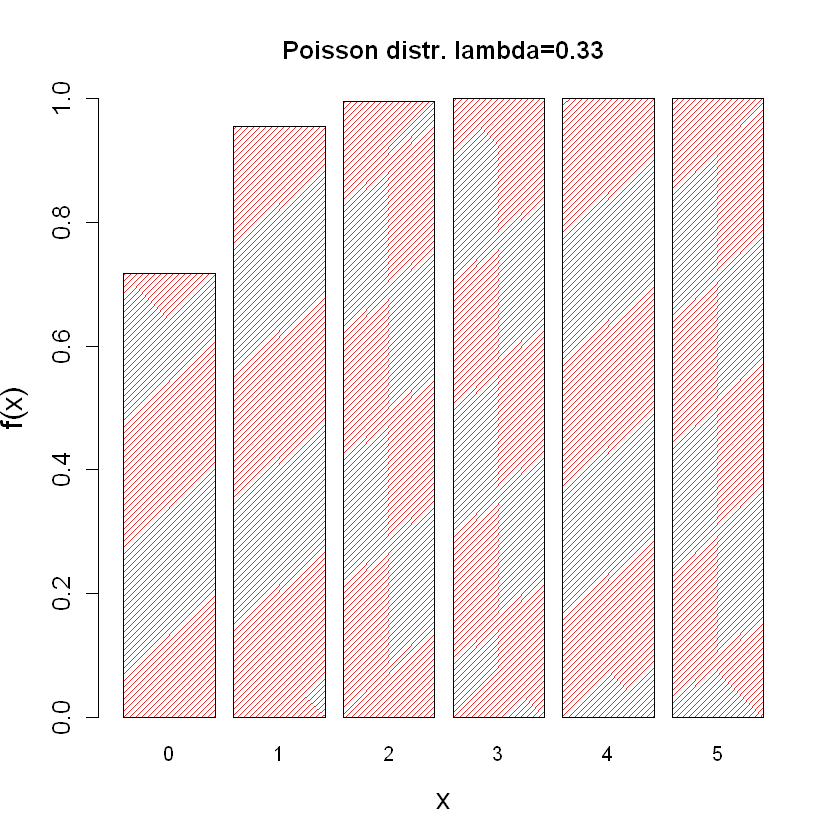

In [10]:
lambda <- 1/3
x <- 0:5
ap <- ppois(x,lambda)
barplot(ap , names=x, col="firebrick2", xlab="x", ylab="f(x)", density=30,
main = sprintf("Poisson distr. lambda=%.2f",lambda),
ylim=c(0,1),
cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)

In [8]:
cat(paste(c("P(>=1|lambda) = ", 1-ap[1],"\n")))

P(>=1|lambda) =  0.283468689426211 


## Exercise 4: Deck of Cards

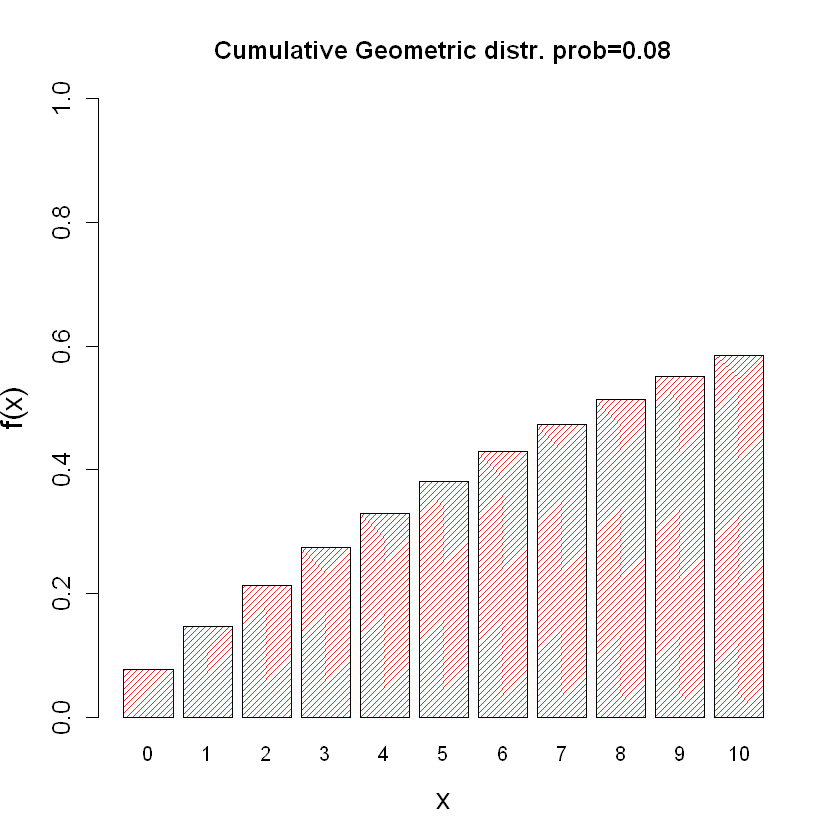

In [10]:
## Probability of drawing 1 ace
p <- 4/52
x <- 0:10 
ap = pgeom(x, p , log = FALSE)
barplot(ap , names=x, col="firebrick2", xlab="x", ylab="f(x)", density=30,
main = sprintf("Cumulative Geometric distr. prob=%.2f",p),
ylim=c(0,1),
cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)


In [11]:
cat(paste(c("P(X>=10|lambda) = ",1-ap[10],"\n")))

P(X>=10|lambda) =  0.449137107141863 


## Exercise 5 - Time to finish a test

In [69]:
f5 <- function(x){    
    result <-ifelse(((x > 1) & (x < 2)),(x-1)*(2-x),0)
    return(result)
    }

In [77]:
#Getting the value of C so the integral is equal to 1
c <- 1/integrate(f5,1,2)$value
c

[1] 6

In [154]:
f5_norm <- function(x){   
    result <-ifelse(((x > 1) & (x < 2)),6*(x-1)*(2-x),0)
    return(result)
    }

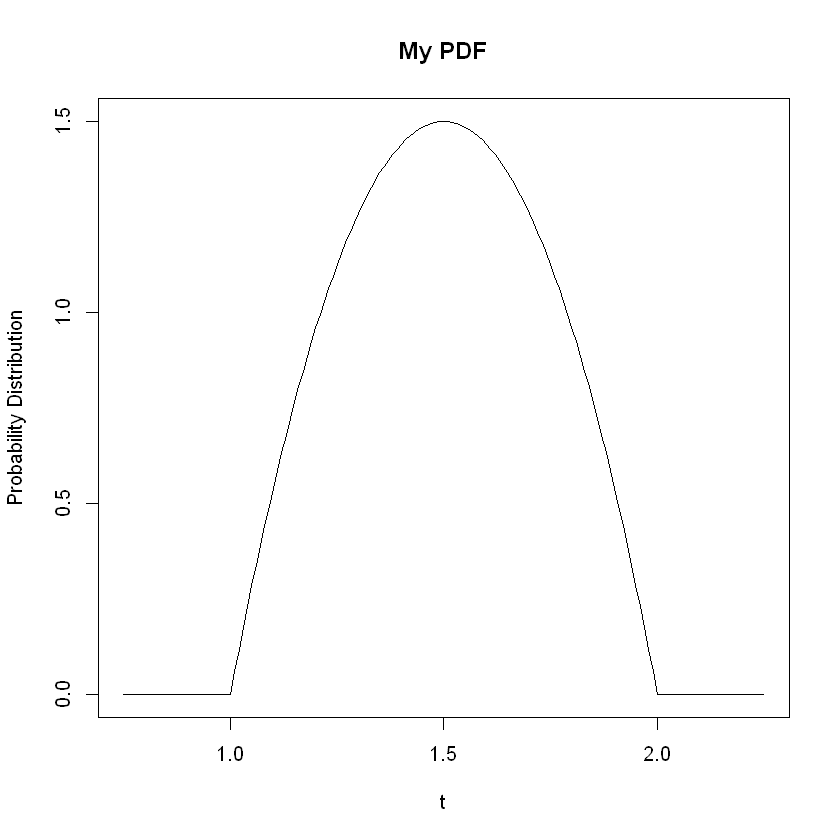

In [222]:
x <- seq(0.75, 2.25, by = 0.01)
plot(x, f5_norm(x), type = "l", ylab = "Probability Distribution",xlab = "t", main = "My PDF") 

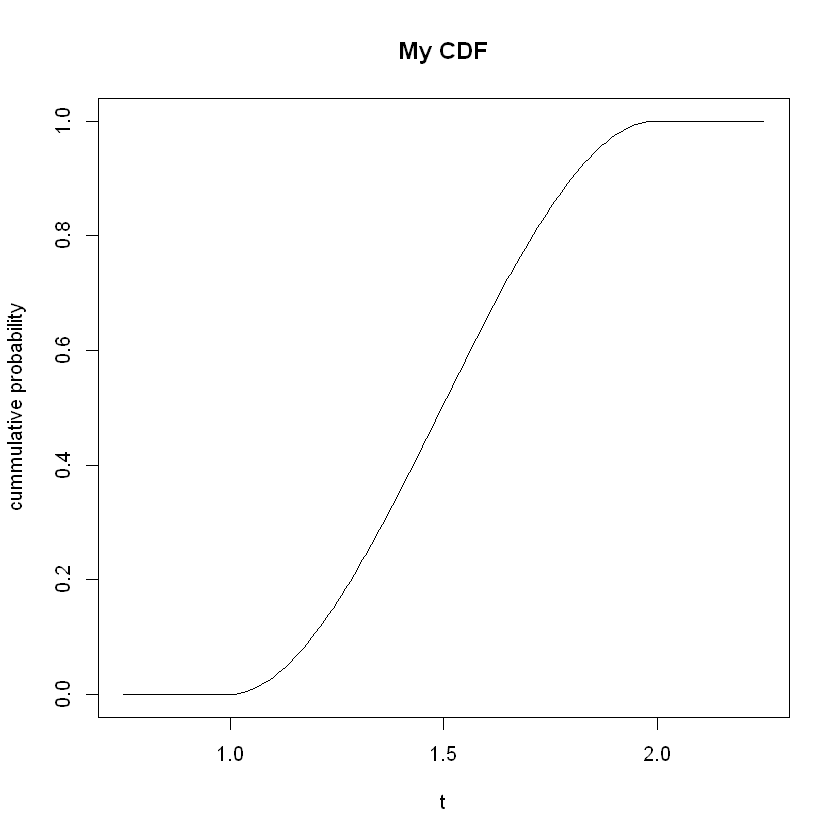

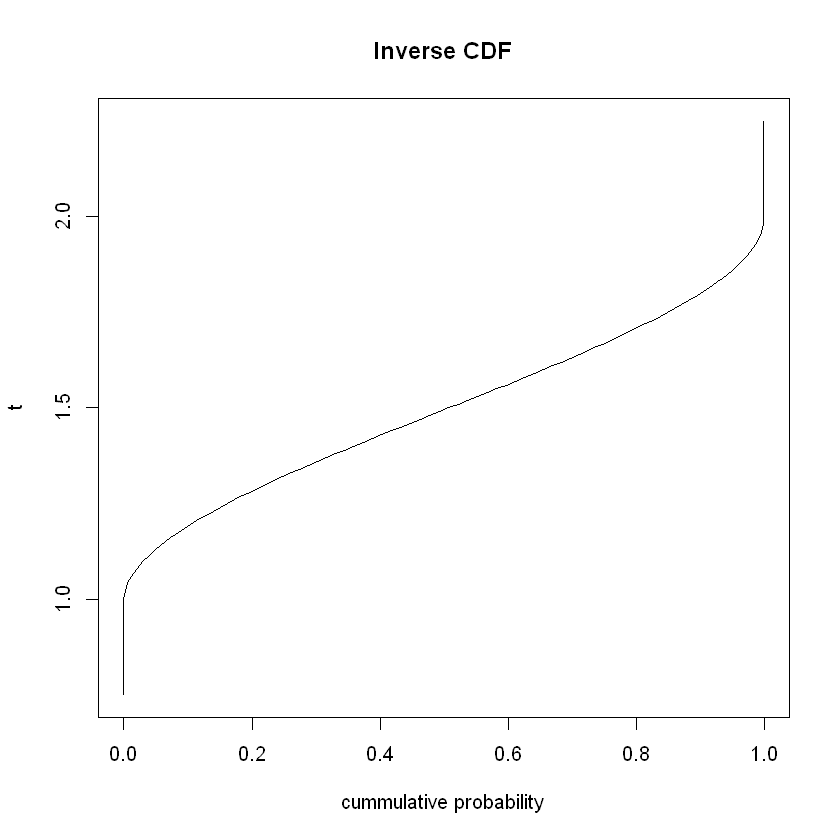

In [249]:
my_cdf <- function(t=1, plot = TRUE){
    
    f5 <- Vectorize(f5_norm)
    dx <- 0.01
    x <- seq(0.75, 2.25, by = dx)
    if (plot == TRUE){
    plot(x, cumsum(f5_norm(x) * dx), type = "l", ylab = "cummulative probability",xlab = "t", main = "My CDF") 
    plot(cumsum(f5_norm(x) * dx), x , type = "l", xlab = "cummulative probability",ylab = "t", main = "Inverse CDF")
    }

    
   return(sum(f5(seq(0.75, t, by = dx)) * dx))
}
cdf_5 <- my_cdf()


In [250]:
x <- seq(0.75, 2.25, by = 0.01)
pdf <- f5_norm(x)

# Interpolate the density
f <- approxfun(x, pdf, yleft=0, yright=0)
# Get the cdf by numeric integration
cdf <- function(x){
  integrate(f, -Inf, x)$value
}
# Use a root finding function to invert the cdf
invcdf <- function(q){
  uniroot(function(x){cdf(x) - q}, range(x))$root
}

In [251]:
#Now we can get values from the inverse cdf if needed

rn <- invcdf(runif(1))
rn

[1] 1.2185

In [244]:
cat(paste(c("P(X>=75 minutes) = ",1-my_cdf(t = 1.25,plot= FALSE),"\n")))
cat(paste(c("P(X>=90 minutes) = ",1-my_cdf(t = 1.5,plot= FALSE),"\n")))
cat(paste(c("P(X>=120 minutes) = ",1-my_cdf(t = 2,plot= FALSE),"\n")))

P(X>=75 minutes) =  0.83815 
P(X>=90 minutes) =  0.49255 
P(X>=120 minutes) =  9.9999999999989e-05 


## Exercise 6 - Tires Sold


In [258]:
f6 <- function(x){    
    result <-ifelse(((x > 1) & (x < 2)),2/(x*x),0)
    return(result)
    }

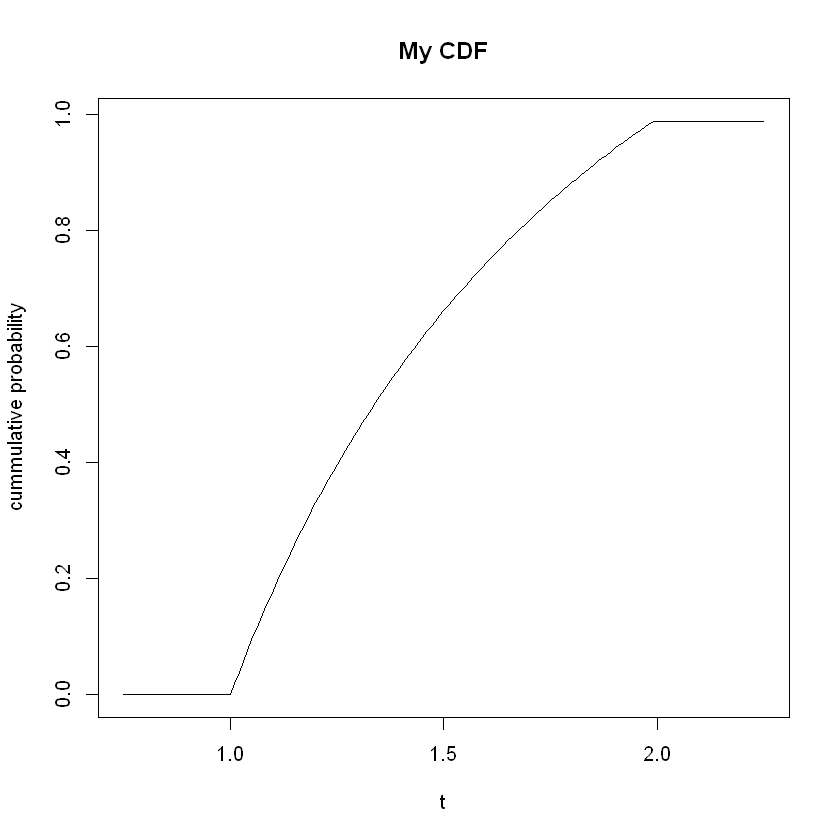

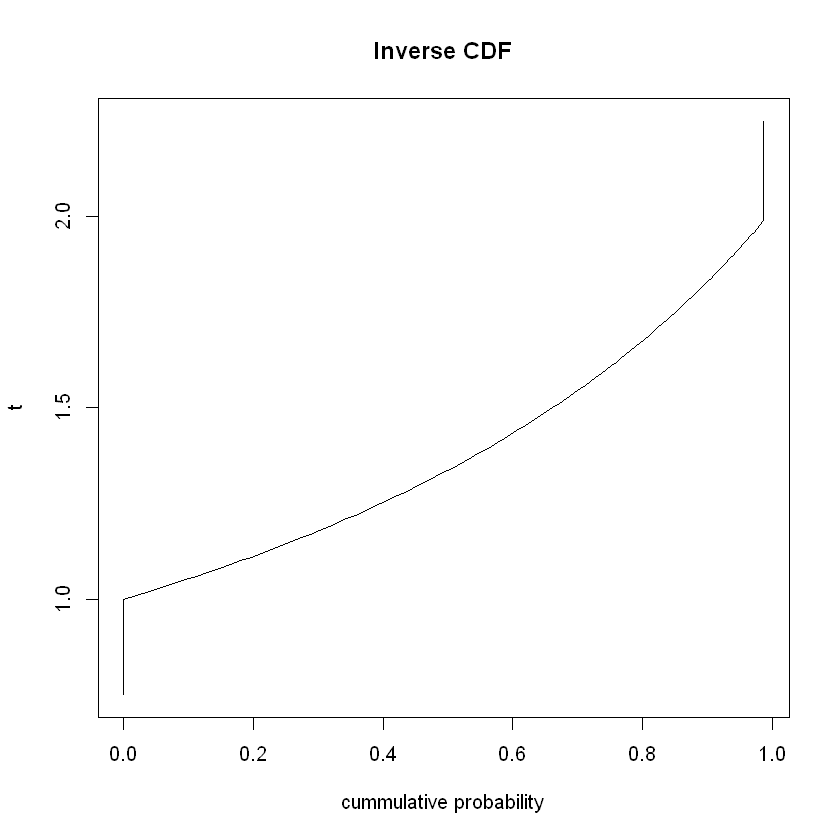

In [260]:
my_cdf6 <- function(t=1, plot = TRUE){
    
    f6 <- Vectorize(f6)
    dx <- 0.01
    x <- seq(0.75, 2.25, by = dx)
    if (plot == TRUE){
    plot(x, cumsum(f6(x) * dx), type = "l", ylab = "cummulative probability",xlab = "t", main = "My CDF") 
    plot(cumsum(f6(x) * dx), x , type = "l", xlab = "cummulative probability",ylab = "t", main = "Inverse CDF")
    }

    
   return(sum(f6(seq(0.75, t, by = dx)) * dx))
}
cdf_6 <- my_cdf6()

In [322]:
x <- seq(0.75, 2.25, by = 0.01)
pdf <- f6(x)

# Interpolate the density
f <- approxfun(x, pdf, yleft=0, yright=0)
# Get the cdf by numeric integration
cdf <- function(x){
  integrate(f, 0, x)$value
}
# Use a root finding function to invert the cdf
invcdf <- function(q){
  uniroot(function(x){cdf(x) - q},range(x), extendInt = "yes")$root
}

In [323]:
cat(paste(c("P(X=<15000 KM) = ",my_cdf6(t = 1.5,plot= FALSE),"\n")))

P(X=<15000 KM) =  0.661134567322404 


In [340]:
#Now we need to sample 3000 variables
samples <- c()
i = 0
while (i < 3000 ){
    ##We use try because there are some cases in which uniroot breaks down (Without try+while usually 2930 samples are obtained)
    try({rn <- invcdf(runif(1))
        samples <- append(samples,rn)},silent=TRUE)
    i <-length(samples)
}




In [341]:
length(samples)

[1] 3000

In [345]:
cat(paste(c("Mean of samples",mean(samples),"\n")))
cat(paste(c("Variance of samples",mean(samples*samples)-mean(samples)**2 ,"\n")))

Mean of samples 1.40613842617794 
Variance of samples 0.0787842909096863 
